In [1]:
# Load the top modules that are used in multiple places
import numpy as np
import pandas as pd

In [2]:
# Some global variables to drive the script
# data_url is the location of the data
# Data is not loaded from a local file
# Data is loaded from a prepocessed dataset
data_url="MachineLearningCVE/processed/small-cicids2017.csv"

In [3]:
# label names (YY) in the data and their
# mapping to numerical values
label_map = {
 'BENIGN' : 0,
 'FTP-Patator' : 1,
 'SSH-Patator' : 2,
 'DoS slowloris' : 3,
 'DoS Slowhttptest': 4,
 'DoS Hulk' : 5,
 'DoS GoldenEye' : 6,
 'Heartbleed' : 7,
 'Web Attack � Brute Force' : 8,
 'Web Attack � XSS' : 8,
 'Web Attack � Sql Injection' : 8,
 'Infiltration' : 9,
 'Bot' : 10,
 'PortScan' : 11,
 'DDoS' : 12,
}

num_ids_features = 76
num_ids_classes = 13
ids_classes = [ 'BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Brute Force', 'XSS', 'Sql Injection', 'Infiltration', 'Bot', 'PortScan', 'DDoS',]

In [4]:
# Utility functions used by GMM

def ids_load_df_from_csv():
    """
    Load dataframe from csv file
    Input:
        None
    Returns:
        None
    """

    df = pd.read_csv(data_url)

    # uncomment print statements for debugging if data does not load
    # print ("load Dataframe shape", df.shape)

    return df

def ids_gmm_std(df):
    """
    Standardize rhe input dataframe
    Input:
        Dataframe that has columns of covariates followed by a column of labels
    Returns:
        X, y as numpy arrays
    """

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    numcols = len(df.columns)
    print("df.shape", df.shape)

    X = df.iloc[:, 0:numcols-1]
    y = df.loc[:, 'YY']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = y.values

    print ("X.shape", X.shape, "y.shape", y.shape)

    return X, y

def ids_gmm_count(y_actual, y_pred):
    """
    """
    c_a = np.sort(np.bincount(y_actual))
    c_a = c_a[c_a != 0]
    c_p = np.sort(np.bincount(y_pred))
    c_p = c_p[c_p != 0]
    print(c_a)
    print(c_p)

def ids_gmm_accuracy (y_actual, y_pred):
    """
    Input:
        Numpy arrays with actual and predicted labels
    Returns:
        multiclass accuracy and f1 scores
    """

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score

    acc = accuracy_score (y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred, average='macro')
    
    return acc, f1

In [6]:
# Clustering using GMM
from sklearn import mixture

df = ids_load_df_from_csv ()
X, y = ids_gmm_std(df)

results_df = pd.DataFrame(columns=['run', 'components','seed', 'BIC'])
maxrun = 5
maxcomp = 25

for run in range (maxrun):
  for i in range (1, maxcomp + 1):
    seed = 42 + run
    clf = mixture.GaussianMixture(n_components=i, covariance_type='full', random_state=seed)
    clf.fit(X)
    bic = clf.bic(X)
    index = run * maxcomp + i
    results_df.loc[index, ['run']] = run
    results_df.loc[index, ['components']] = i
    results_df.loc[index, ['seed']] = seed
    results_df.loc[index, ['BIC']] = bic
    print ("run", run, "i", i, "BIC", bic)

df.shape (39616, 77)
X.shape (39616, 76) y.shape (39616,)
run 0 i 1 BIC -12160060.530894967
run 0 i 2 BIC -16580730.789563118
run 0 i 3 BIC -18738155.911488444
run 1 i 1 BIC -12160060.530894967
run 1 i 2 BIC -14893537.130494056
run 1 i 3 BIC -18489653.920543816
run 2 i 1 BIC -12160060.530894967
run 2 i 2 BIC -16580730.789563118
run 2 i 3 BIC -20598100.543173242
run 3 i 1 BIC -12160060.530894967
run 3 i 2 BIC -17104566.156656012
run 3 i 3 BIC -20828507.056385823
run 4 i 1 BIC -12160060.530894967
run 4 i 2 BIC -16700716.110728728
run 4 i 3 BIC -18489653.920543816


In [7]:
print(results_df)

   run components seed          BIC
1    0          1   42 -1.21601e+07
2    0          2   42 -1.65807e+07
3    0          3   42 -1.87382e+07
4    1          1   43 -1.21601e+07
5    1          2   43 -1.48935e+07
6    1          3   43 -1.84897e+07
7    2          1   44 -1.21601e+07
8    2          2   44 -1.65807e+07
9    2          3   44 -2.05981e+07
10   3          1   45 -1.21601e+07
11   3          2   45 -1.71046e+07
12   3          3   45 -2.08285e+07
13   4          1   46 -1.21601e+07
14   4          2   46 -1.67007e+07
15   4          3   46 -1.84897e+07


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

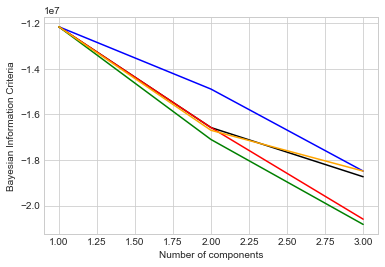

In [9]:
colors = ('black', 'blue', 'red', 'green', 'orange')
for iter in range (1, 6):
  low = (iter - 1) * maxcomp
  high = (iter) * maxcomp
  x = results_df[low:high].components.values
  y = results_df[low:high].BIC.values
  plt.xlabel("Number of components")
  plt.ylabel("Bayesian Information Criteria")
  plt.plot(x, y, '-', color=colors[iter-1])